# Aim: Create a binary classification model to classify pateints into either negative/positive for monkey pox disease

In [166]:
# import libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# import dataset

dataset = pd.read_excel(r'C:\Users\sai\OneDrive\Desktop\Dhana_Assignments\DATA.xlsx')
dataset.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


# EDA

In [33]:
dataset['MonkeyPox'].unique()

array(['Negative', 'Positive'], dtype=object)

In [34]:
dataset['MonkeyPox'].value_counts()

Positive    15909
Negative     9091
Name: MonkeyPox, dtype: int64

In [36]:
dataset['MonkeyPox'].value_counts(normalize=True)*100

Positive    63.636
Negative    36.364
Name: MonkeyPox, dtype: float64

<h3><span style='color:green'>
63.63% of the patients in the given datset are postive for monkey pox, where as 36.36% of the patients are negative for monkeypox. This is not a balance dataset.</span></h3>

(-1.25, 1.25, -1.25, 1.25)

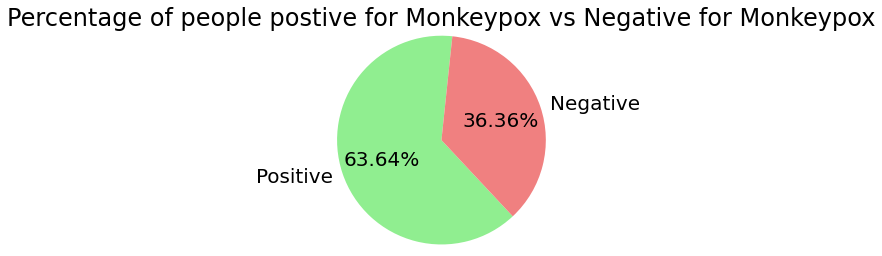

In [156]:
plt.title("Percentage of people postive for Monkeypox vs Negative for Monkeypox")
plt.pie(dataset['MonkeyPox'].value_counts(),
        labels=['Positive','Negative'],
        colors=['lightgreen','lightcoral'],
        autopct='%1.2f%%',
        startangle=84,
        radius=1.2)

plt.axis("off")

Analysing all the sysmptoms given for the Monkeypox diseases

In [65]:
print(f"symptoms identified for MonkeyPox patients in the given data: \n\n {dataset.iloc[:,1:10].columns}")

symptoms identified for MonkeyPox patients in the given data: 

 Index(['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection'],
      dtype='object')


In [72]:
print(f" In total there are {dataset.iloc[:,1:10].columns.nunique()} symptoms identified")

 In total there are 9 symptoms identified


<h3><span style='color:blue'>Count of patients suffered each symptoms</h3></span>

In [117]:
symptoms = dataset.iloc[:,1:10].columns
d = {}
for symptom in symptoms:
    d[symptom]=dataset[symptom].value_counts()
        
df = pd.DataFrame(d)
df.fillna(' ',inplace=True)
df  


,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
Fever,6382,,,,,,,,
Muscle Aches and Pain,6150,,,,,,,,
None,6216,,,,,,,,
Swollen Lymph Nodes,6252,,,,,,,,
False,,12655,12446,12388,12514,12473,12467,12416,12554
True,,12345,12554,12612,12486,12527,12533,12584,12446


In [118]:
symptoms = dataset.iloc[:,1:10].columns
d = {}
for symptom in symptoms:
    d[symptom]=dataset[symptom].value_counts(normalize=True)
        
df = pd.DataFrame(d)
df.fillna(' ',inplace=True)
df  


,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
Fever,0.25528,,,,,,,,
Muscle Aches and Pain,0.246,,,,,,,,
None,0.24864,,,,,,,,
Swollen Lymph Nodes,0.25008,,,,,,,,
False,,0.5062,0.49784,0.49552,0.50056,0.49892,0.49868,0.49664,0.50216
True,,0.4938,0.50216,0.50448,0.49944,0.50108,0.50132,0.50336,0.49784


Nearly 50 percent of the patients have suffered Rectal Pain, sore throat, penile oedoma, oral lesions, solitary lesion, swollen tonsils, HIV infection, STD 25 percent of patients had fever, muscle aches, swollen lymph nodes 


<h3><span style='color:green'>
Systemic Illness</span></h3>

In [76]:
dataset['Systemic Illness'].value_counts(normalize=True)

Fever                    0.25528
Swollen Lymph Nodes      0.25008
None                     0.24864
Muscle Aches and Pain    0.24600
Name: Systemic Illness, dtype: float64

(0.0, 13181.7, 1.5, -0.5)

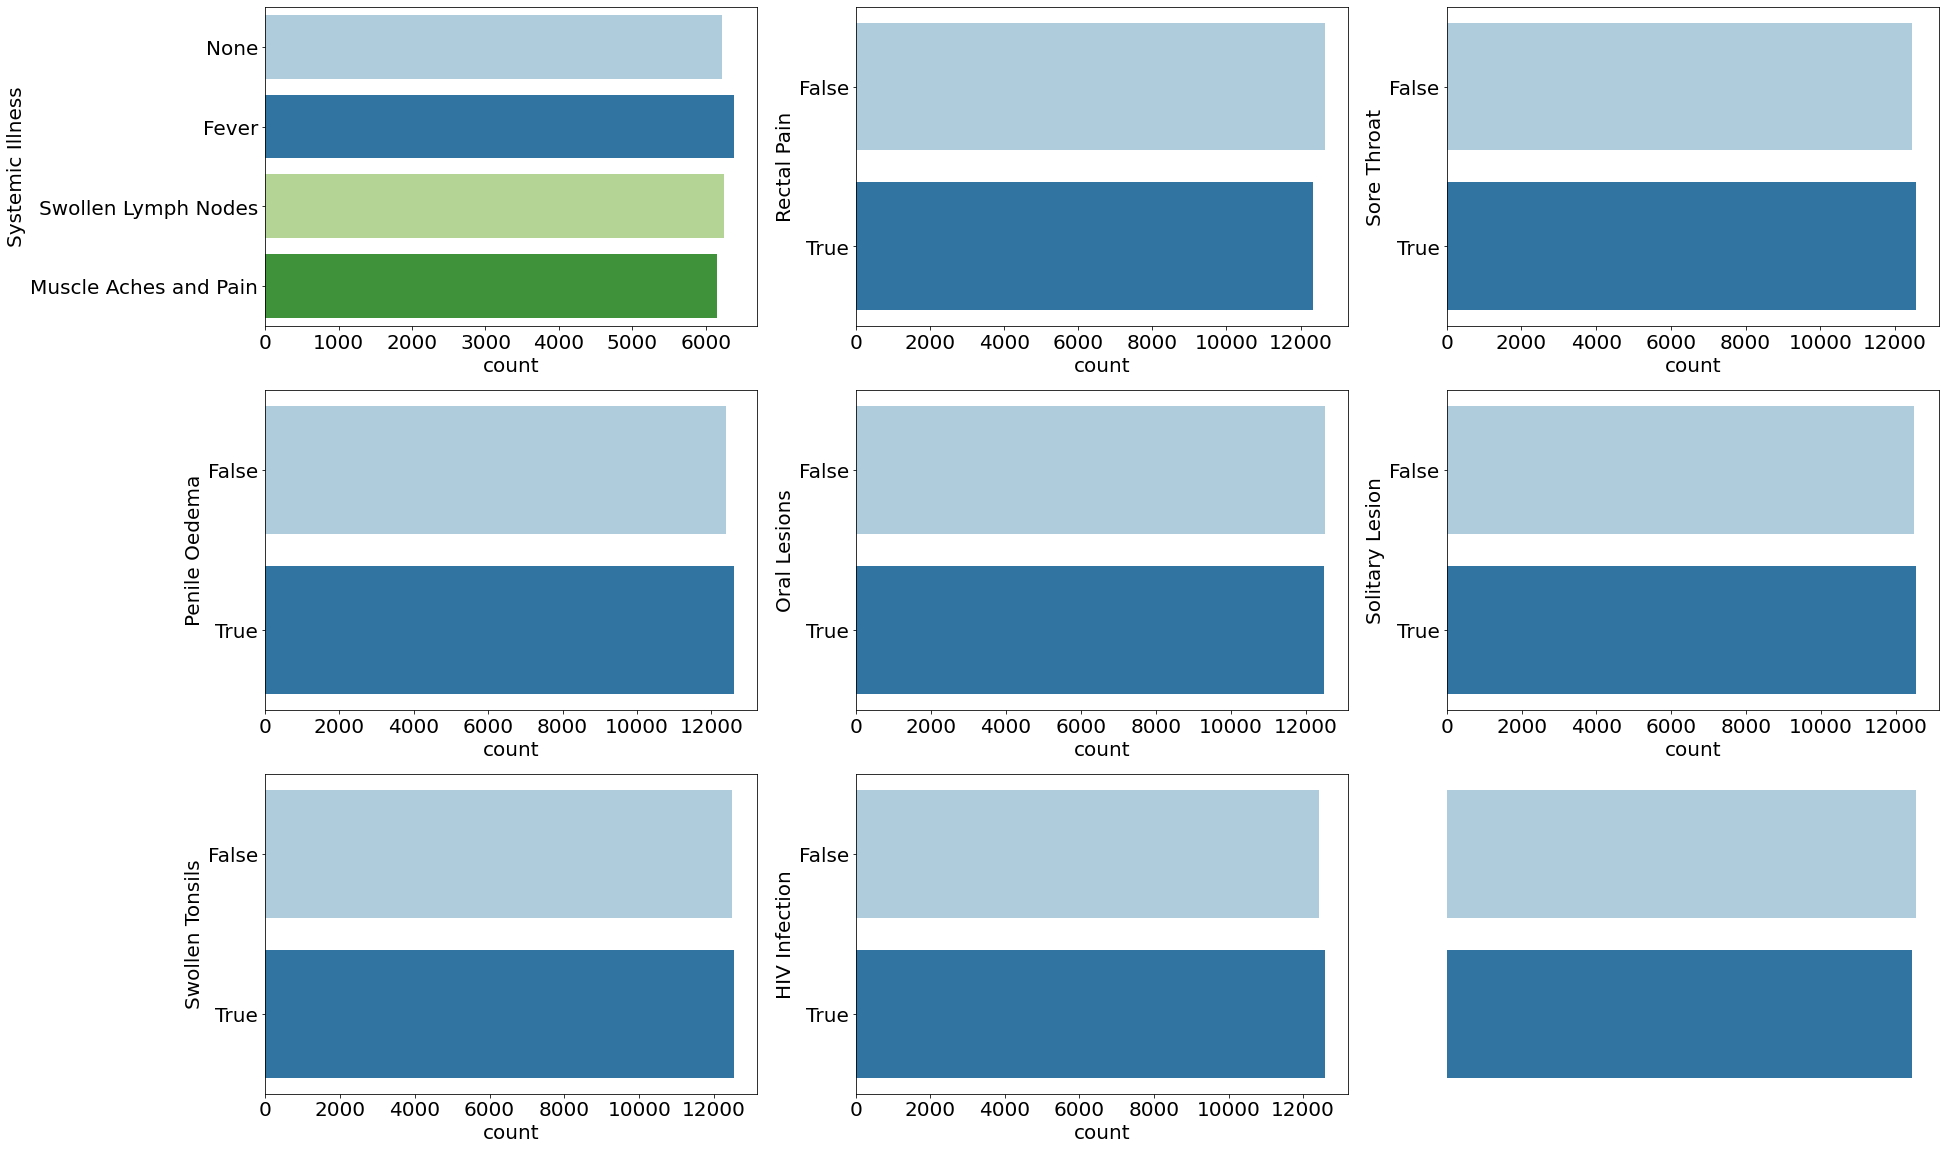

In [157]:
plt.figure(figsize=(30,20))
plt.rc('font', size=20)
for i in range(1,len(symptoms)+1):
    plt.subplot(3,3,i)
    sns.countplot(y=dataset[symptoms[i-1]],palette='Paired')
plt.axis("off")

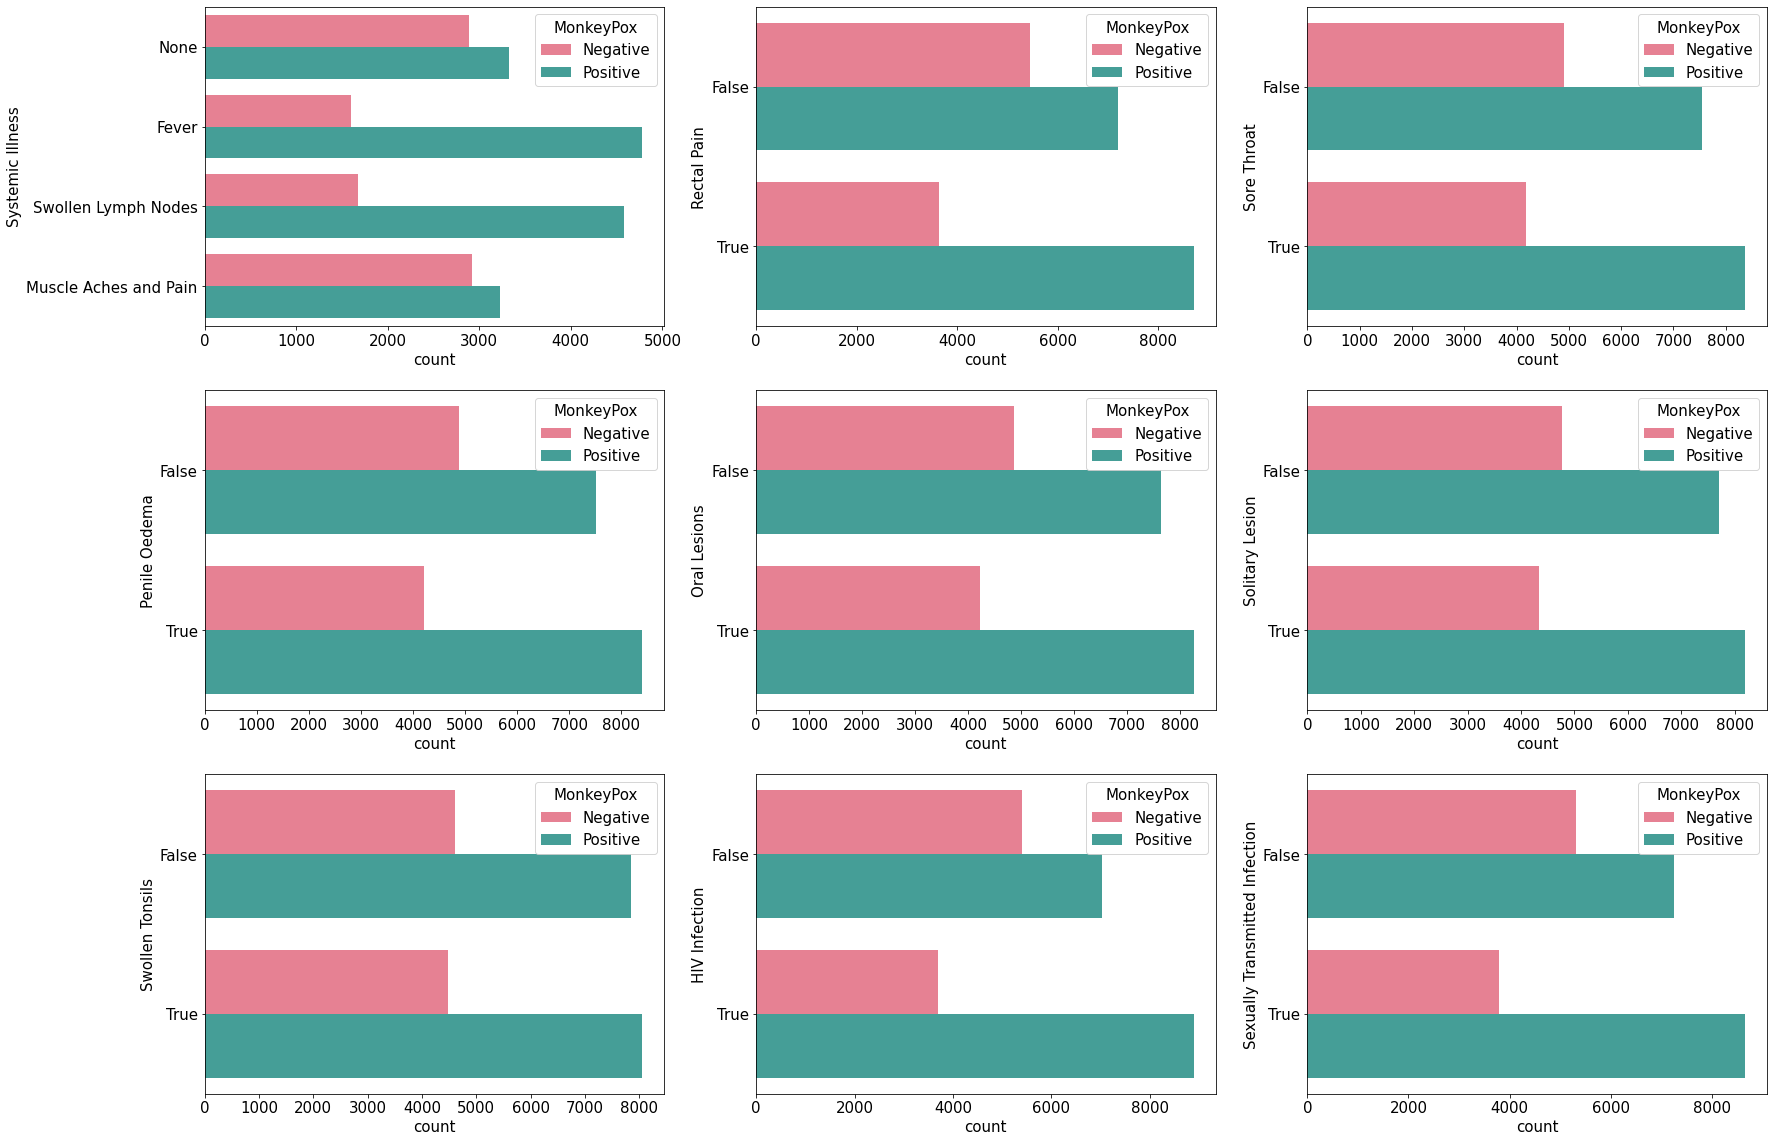

In [131]:
plt.figure(figsize=(28,20))
plt.rc('font', size=15)
for i in range(1,len(symptoms)+1):
    plt.subplot(3,3,i)
    sns.countplot(y=dataset[symptoms[i-1]],palette='husl',hue=dataset['MonkeyPox'])

In [164]:
corr_data = dataset[1:].corr()
corr_data

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
Rectal Pain,1.000000,0.006254,0.005351,0.007787,0.001107,0.002152,0.005724,0.000627
Sore Throat,0.006254,1.000000,0.009043,-0.000835,-0.003570,-0.002051,0.000811,-0.001862
Penile Oedema,0.005351,0.009043,1.000000,0.003811,0.002821,0.000497,0.003660,-0.005682
Oral Lesions,0.007787,-0.000835,0.003811,1.000000,-0.005158,-0.007797,-0.012113,-0.002685
Solitary Lesion,0.001107,-0.003570,0.002821,-0.005158,1.000000,0.002914,-0.002375,0.009810
Swollen Tonsils,0.002152,-0.002051,0.000497,-0.007797,0.002914,1.000000,-0.004218,-0.006429
HIV Infection,0.005724,0.000811,0.003660,-0.012113,-0.002375,-0.004218,1.000000,0.001269
Sexually Transmitted Infection,0.000627,-0.001862,-0.005682,-0.002685,0.009810,-0.006429,0.001269,1.000000


<AxesSubplot:>

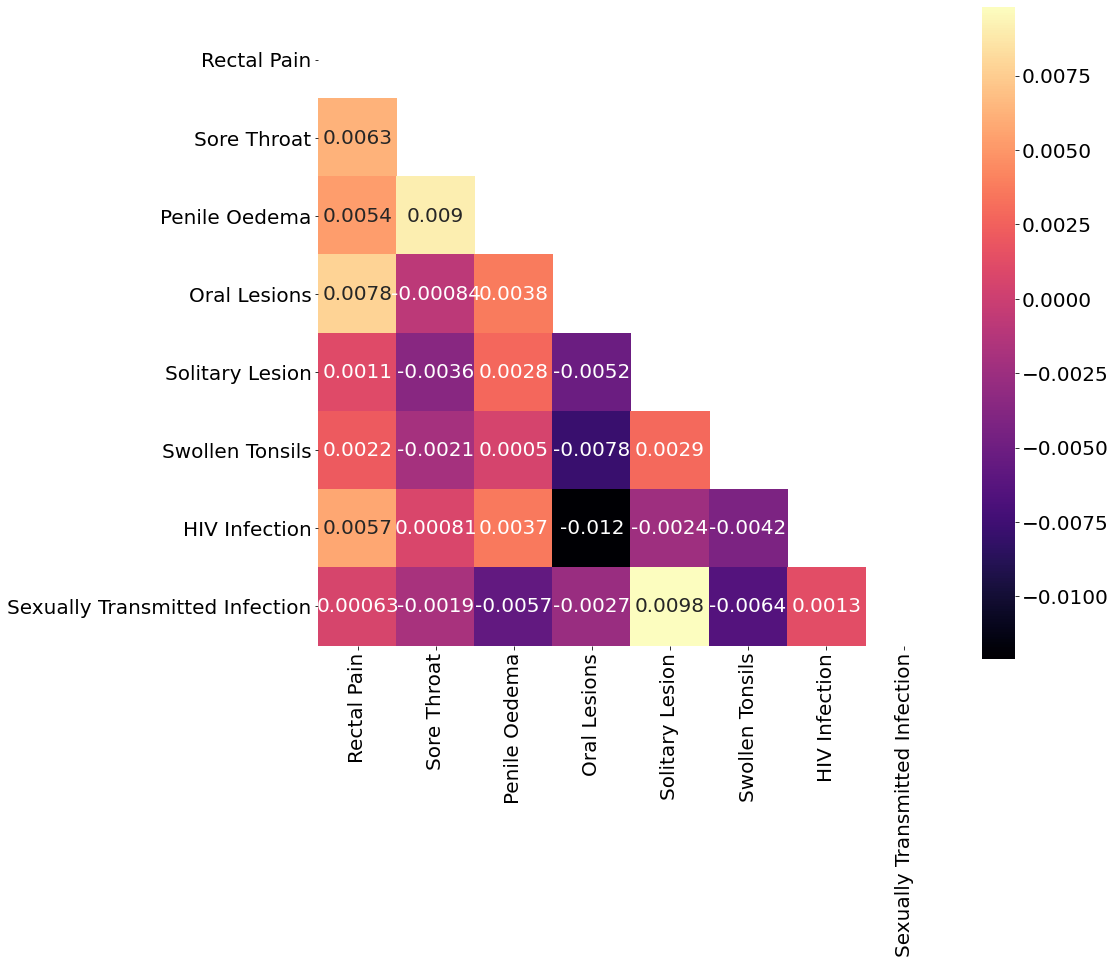

In [167]:
mask = np.triu(np.ones_like(corr_data, dtype=np.bool))
plt.figure(figsize=(14,12))
sns.heatmap(corr_data,
            square=True, 
            mask=mask,
            annot=True,
            cmap='magma')